In [ ]:
# default_exp edaguide

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
import csv
import sys

from IPython.display import clear_output, display
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
input_file = '../data/FIFA 2018 Statistics.csv'
output_file = '../data/labels.csv'
df = pd.read_csv(input_file)
target = 'Man of the Match'
features = ['Goal Scored', 'Ball Possession %', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides', 
           'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)', 'Fouls Committed', 
            'Yellow Card', 'Red', '1st Goal']

In [ ]:
def write_csv(labels, output_path):
    print(f"Writing to {output_path}")
    with open(output_path, 'w') as csvfile:
        fieldnames = ['id', 'label']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for label in labels:
            writer.writerow({'id': label[0], 'label': label[1]})

In [ ]:
def label_data(df, features, target, output_path):
    labels = []
    x = df[features]
    available_labels = df[target].unique()
    print(f"Available labels: {', '.join(available_labels)}")
    while True:
        clear_output()
        row = x.sample(1, replace=False)
        display(row)
        label = input('Enter label or type in save: ')
        if label.lower() == 'save':
            break
        elif label not in available_labels:
            while True:
                label = input(f"Enter one of the following labels: {', '.join(available_labels)}")
                if label in available_labels:
                    break
        labels.append((row.index[0], label))
    write_csv(labels, output_path)

In [ ]:
label_data(df, features, target, output_file)

,Goal Scored,Ball Possession %,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Red,1st Goal
57,1,29,6,1,1,3,2,17,4,77,213,110,13,2,0,32.0


Enter label or type in save: save
Writing to ../data/labels.csv


In [ ]:
def plot_confusion_matrix(df, output_file, target):
    labels = df[target].unique()
    label_df = pd.read_csv(output_file)
    mapping = {}
    for ix, label in enumerate(labels):
        mapping[ix] = label
    df = df.join(label_df.set_index('id'))
    df = df[~df.label.isna()]
    df.replace(mapping, inplace=True)
    cm = confusion_matrix(df[target], df['label'], labels=labels)
    fig = plt.figure()
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap=plt.cm.Blues)
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(labels); 
    ax.yaxis.set_ticklabels(labels);

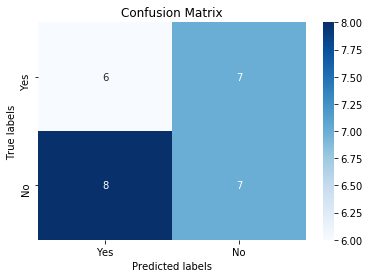

In [ ]:
plot_confusion_matrix(df, output_file, target)